In [143]:
import pandas as pd
import numpy as np
import requests
import json
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from time import sleep
from random import randint
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
anime_name=list()               #x
link_to_anime_page=list()       #x
anime_genres=list()             #x
anime_type=list() #types for example:tv,movie,Original video animation x
anime_aired=list()              #x
anime_members=list()            #x
anime_broadcast=list()          #x
anime_licensors=list()          #x
anime_favorites=list()          #x
anime_popularity=list()         #x
anime_score=list()              #x

df = pd.read_csv('anime_data_final.csv')
print(df)

      Unnamed: 0                                         anime name  \
0              0                   Fullmetal Alchemist: Brotherhood   
1              1                          Bleach: Sennen Kessen-hen   
2              2                                        Steins;Gate   
3              3                                           Gintama°   
4              4         Kaguya-sama wa Kokurasetai: Ultra Romantic   
...          ...                                                ...   
4995        4995                                         Ze Tian Ji   
4996        4996              Twisted Wonderland 1st Anniversary PV   
4997        4997  Witch Craft Works: Takamiya-kun to Imouto no W...   
4998        4998                      Wo Shi Da Shenxian 2nd Season   
4999        4999  Youkai Watch Movie 4: Shadow Side - Oni-ou no ...   

         anime_type          anime_aired      anime_members  \
0       TV (64 eps)  Apr 2009 - Jul 2010  3,088,738 members   
1       TV (13 eps)  

In [89]:
df1 = pd.DataFrame()
df1 = df[df != '[]']
df1 = df1.dropna()
df1.reset_index(inplace=True)
df1 = df1.drop(df.columns[[0]],axis = 1)
df1.drop('index', inplace=True, axis=1)
print(df1)
df1.to_csv('anime_data_aftercleaning.csv')

                                             anime name     anime_type  \
0                      Fullmetal Alchemist: Brotherhood    TV (64 eps)   
1                             Bleach: Sennen Kessen-hen    TV (13 eps)   
2                                           Steins;Gate    TV (24 eps)   
3                                              Gintama°    TV (51 eps)   
4            Kaguya-sama wa Kokurasetai: Ultra Romantic    TV (13 eps)   
...                                                 ...            ...   
1862                                         THE POLiCY  Music (1 eps)   
1863                                              X OVA    OVA (1 eps)   
1864                                         Ze Tian Ji   ONA (13 eps)   
1865  Witch Craft Works: Takamiya-kun to Imouto no W...    OVA (1 eps)   
1866  Youkai Watch Movie 4: Shadow Side - Oni-ou no ...  Movie (1 eps)   

              anime_aired      anime_members  \
0     Apr 2009 - Jul 2010  3,088,738 members   
1     Oct 2022 

In [288]:
anime_scored_by=list()
df2 = df1.copy()
for x in range(len(df2)):
    anime_scored_by.append(df2.iloc[x]["anime_score"])
df2["anime_scored_by"] = anime_scored_by
df2["anime_genres"] = df2["anime_genres"].str[10:-2]
df2["anime_broadcast"] = df2["anime_broadcast"].str[13:-2]
df2["anime_members"] = df2["anime_members"].str[:-7]
df2["anime_licensors"] = df2["anime_licensors"].str[13:-2]
df2["anime_favorites"] = df2["anime_favorites"].str[13:-2]
df2["anime_popularity"] = df2["anime_popularity"].str[15:-2]
df2["anime_score"] = df2["anime_score"].str[9:]
df2["anime_score"] = df2["anime_score"].str[:5]
df2["anime_scored_by"] = df2["anime_scored_by"].str[26:-9]
df2.to_csv('anime_data_aftercleaning1.csv')
df2

,anime name,anime_type,anime_aired,anime_members,anime_genres,anime_broadcast,anime_licensors,anime_favorites,anime_popularity,anime_score,link_to_anime_page,anime_scored_by
0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,"3,088,738","Action, Adventure, Drama, Fantasy",Sundays at 17:00 (JST),"Funimation, Aniplex of America","213,309",3,9.111,https://myanimelist.net/anime/5114/Fullmetal_A...,"1,963,910"
1,Bleach: Sennen Kessen-hen,TV (13 eps),Oct 2022 - Dec 2022,"388,119","Action, Adventure, Fantasy",Tuesdays at 00:00 (JST),VIZ Media,"15,729",526,9.101,https://myanimelist.net/anime/41467/Bleach__Se...,"170,485"
2,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,"2,379,223","Drama, Sci-Fi, Suspense",Wednesdays at 02:05 (JST),Funimation,"179,519",13,9.081,https://myanimelist.net/anime/9253/Steins_Gate,"1,304,594"
3,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,"577,775","Action, Comedy, Sci-Fi",Wednesdays at 18:00 (JST),"Funimation, Crunchyroll","15,534",337,9.071,https://myanimelist.net/anime/28977/Gintama%C2%B0,"231,368"
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,"755,828","Comedy, Romance",Saturdays at 00:00 (JST),Aniplex of America,"27,176",226,9.071,https://myanimelist.net/anime/43608/Kaguya-sam...,"404,798"
...,...,...,...,...,...,...,...,...,...,...,...,...
1862,THE POLiCY,Music (1 eps),Oct 2022 - Oct 2022,764,"Drama, Girls Love, Horror",Saturdays at 01:55 (JST),"None found, add some","2,556",780,6.801,https://myanimelist.net/anime/53396/THE_POLiCY,"125,962"
1863,X OVA,OVA (1 eps),Aug 2001 - Aug 2001,"12,611","Action, Comedy, Romance",Unknown,Funimation,884,574,6.801,https://myanimelist.net/anime/595/X_OVA,"189,569"
1864,Ze Tian Ji,ONA (13 eps),Jul 2015 - Dec 2015,"7,822","Action, Adventure",Tuesdays at 18:30 (JST),Bandai Entertainment,3,10639,6.801,https://myanimelist.net/anime/31838/Ze_Tian_Ji,465
1865,Witch Craft Works: Takamiya-kun to Imouto no W...,OVA (1 eps),Jan 2015 - Jan 2015,"33,515","Adventure, Comedy, Sci-Fi",Tuesdays at 02:12 (JST),Funimation,230,2377,6.791,https://myanimelist.net/anime/22117/Witch_Craf...,"30,671"


In [298]:
# EDA_visualization
anime_genres_split=list()
df3 = pd.read_csv('anime_data_aftercleaning1.csv')
df4 = df3["anime_genres"].str.split(', ')
for x in range(len(df4)):
    temp_list = df4[x]
    for str1 in range(len(df4[x])):
            anime_genres_split.append(temp_list[str1])
df9= pd.DataFrame({'genre':anime_genres_split})
data = df9.value_counts()
data

genre        
Comedy           851
Action           772
Fantasy          571
Drama            541
Adventure        525
Romance          488
Sci-Fi           439
Supernatural     328
Mystery          209
Slice of Life    199
Ecchi            125
Sports            71
Horror            66
Suspense          53
Award Winning     52
Gourmet           35
Girls Love        27
Boys Love         20
Avant Garde        8
dtype: int64

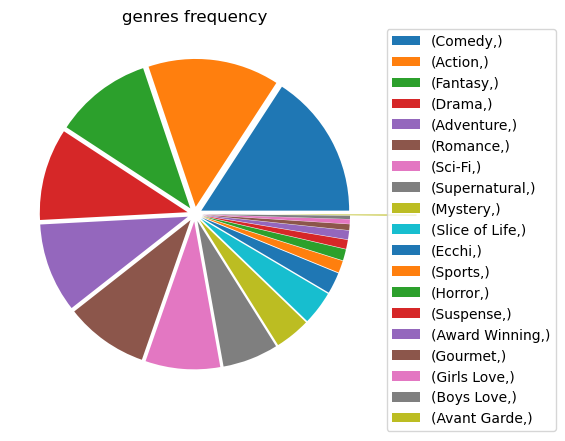

In [309]:
ax = data.plot.pie(legend=True,  ylabel='', labeldistance=None, title="genres frequency",explode=explode)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show() #decending order

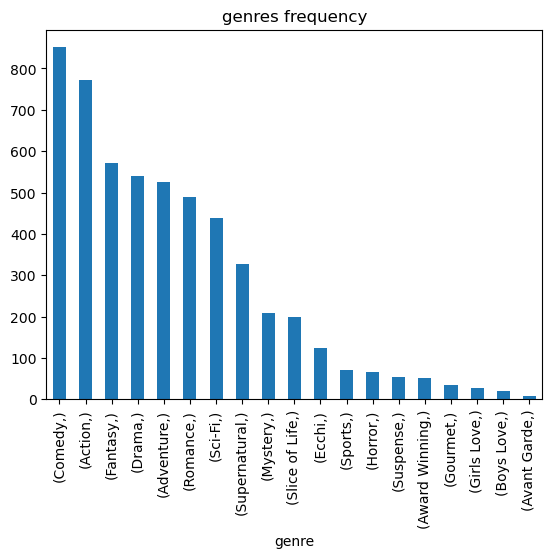

In [314]:
ax = data.plot.bar(ylabel='', title="genres frequency")
plt.show() #decending order

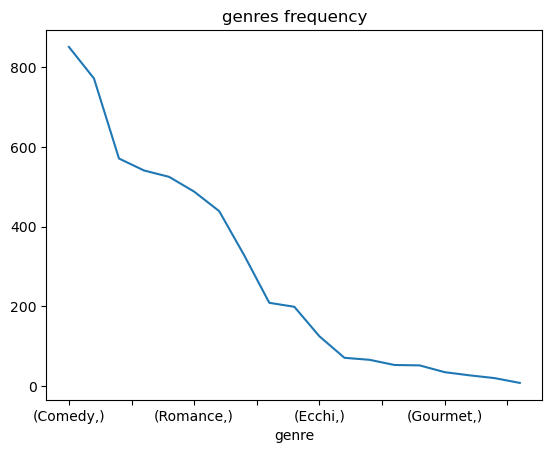

In [315]:
ax = data.plot.line(ylabel='', title="genres frequency")
plt.show() #decending order

In [197]:
# EDA_visualization
anime_genres_split=list()
df3 = pd.read_csv('anime_data_aftercleaning1.csv')
#print(df3["anime_genres"].value_counts(ascending=True))
df4 = df3["anime_genres"].str.split(',')
print(df4[1])
print(len(df4[1]))



['Action', ' Adventure', ' Fantasy']
3


In [20]:
anime_name=list()         
link_to_anime_page=list() 
anime_genres=list()       
anime_type=list()
anime_aired=list()        
anime_members=list()      
anime_broadcast=list()    
anime_licensors=list()    
anime_favorites=list()    
anime_popularity=list()   
anime_score=list()        

df1 = pd.read_csv('anime_data(0-1000).csv')
df2 = pd.read_csv('anime_data(1000-2000).csv')
df3 = pd.read_csv('anime_data(2000-3000).csv')
df4 = pd.read_csv('anime_data(3000-4000).csv')
df5 = pd.read_csv('anime_data1(4000-4500).csv')
df6 = pd.read_csv('anime_data4500-5000.csv')
df7 = pd.read_csv('anime_data2.csv')
for x in range(1000):
    anime_genres.append(df1.iloc[x][1])
    anime_broadcast.append(df1.iloc[x][2])
    anime_licensors.append(df1.iloc[x][3])
    anime_favorites.append(df1.iloc[x][4])
    anime_popularity.append(df1.iloc[x][5])
    anime_score.append(df1.iloc[x][6])
for x in range(1000):
    anime_genres.append(df2.iloc[x][1])
    anime_broadcast.append(df2.iloc[x][2])
    anime_licensors.append(df2.iloc[x][3])
    anime_favorites.append(df2.iloc[x][4])
    anime_popularity.append(df2.iloc[x][5])
    anime_score.append(df2.iloc[x][6])
for x in range(1000):
    anime_genres.append(df3.iloc[x][1])
    anime_broadcast.append(df3.iloc[x][2])
    anime_licensors.append(df3.iloc[x][3])
    anime_favorites.append(df3.iloc[x][4])
    anime_popularity.append(df3.iloc[x][5])
    anime_score.append(df3.iloc[x][6])
for x in range(1000):
    anime_genres.append(df4.iloc[x][1])
    anime_broadcast.append(df4.iloc[x][2])
    anime_licensors.append(df4.iloc[x][3])
    anime_favorites.append(df4.iloc[x][4])
    anime_popularity.append(df4.iloc[x][5])
    anime_score.append(df4.iloc[x][6])
for x in range(500):
    anime_genres.append(df5.iloc[x][1])
    anime_broadcast.append(df5.iloc[x][2])
    anime_licensors.append(df5.iloc[x][3])
    anime_favorites.append(df5.iloc[x][4])
    anime_popularity.append(df5.iloc[x][5])
    anime_score.append(df5.iloc[x][6])
for x in range(500):
    anime_genres.append(df6.iloc[x][1])
    anime_broadcast.append(df6.iloc[x][2])
    anime_licensors.append(df6.iloc[x][3])
    anime_favorites.append(df6.iloc[x][4])
    anime_popularity.append(df6.iloc[x][5])
    anime_score.append(df6.iloc[x][6])
for x in range(5000):
    anime_name.append(df7.iloc[x][1])
    link_to_anime_page.append(df7.iloc[x][2])
    anime_type.append(df7.iloc[x][3])
    anime_aired.append(df7.iloc[x][4])
    anime_members.append(df7.iloc[x][5])
    
df8= pd.DataFrame({'anime name':anime_name,
                'anime_type':anime_type,
                'anime_aired':anime_aired,
                'anime_members':anime_members,
                'anime_genres':anime_genres,
                'anime_broadcast':anime_broadcast,
                'anime_licensors':anime_licensors,
                'anime_favorites':anime_favorites,
                'anime_popularity':anime_popularity,
                'anime_score':anime_score,
                'link_to_anime_page':link_to_anime_page,})
df8.to_csv('anime_data_final.csv')
print(df8)

                                             anime name     anime_type  \
0                      Fullmetal Alchemist: Brotherhood    TV (64 eps)   
1                             Bleach: Sennen Kessen-hen    TV (13 eps)   
2                                           Steins;Gate    TV (24 eps)   
3                                              Gintama°    TV (51 eps)   
4            Kaguya-sama wa Kokurasetai: Ultra Romantic    TV (13 eps)   
...                                                 ...            ...   
4995                                         Ze Tian Ji   ONA (13 eps)   
4996              Twisted Wonderland 1st Anniversary PV    ONA (1 eps)   
4997  Witch Craft Works: Takamiya-kun to Imouto no W...    OVA (1 eps)   
4998                      Wo Shi Da Shenxian 2nd Season   ONA (16 eps)   
4999  Youkai Watch Movie 4: Shadow Side - Oni-ou no ...  Movie (1 eps)   

              anime_aired      anime_members  \
0     Apr 2009 - Jul 2010  3,088,738 members   
1     Oct 2022 

In [19]:
anime_name=list()  
df1 = pd.read_csv('anime_data(0-1000).csv')
for x in range(1000):
    
print(anime_genres)

["['Genres: Action, Adventure, Drama, Fantasy']", "['Genres: Action, Adventure, Fantasy']", "['Genres: Drama, Sci-Fi, Suspense']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Comedy, Romance']", "['Genres: Action, Drama']", "['Genres: Action, Comedy, Drama, Sci-Fi']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Action, Adventure, Fantasy']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Drama, Sci-Fi']", "['Genres: Drama, Romance, Supernatural']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Comedy, Drama, Romance']", "['Genres: Drama, Slice of Life']", '[]', "['Genres: Drama, Romance, Supernatural']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Award Winning, Drama']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Action, Award Winning, Drama, Sci-Fi']", "['Genres: Award Winning, Drama, Fantasy']", "['Genres: Comedy, Mystery, Supernatural']", "['Genres: Action, Comedy, Sci-Fi']", "['Genres: Drama, Mystery, Suspense']", "['Genres: Award Winning, Drama, Supernat

In [142]:
website = "https://myanimelist.net/topanime.php"
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
driver.get(website)

for x in range(100):
    matches = driver.find_elements('xpath', '//tr/td[2]/div/div[2]/h3/a')
    for match in matches:
        name = match.text
        anime_name.append(name)
        link = match.get_attribute('href')
        link_to_anime_page.append(link)    
    matches1 = driver.find_elements('xpath', '//tr/td/div/div[3]')
    for match1 in matches1:
        all_text = match1.text.splitlines()
        anime_type.append(all_text[0])
        anime_aired.append(all_text[1])
        anime_members.append(all_text[2])                                                        
    try:
        element = WebDriverWait(driver, 30).until(
        EC.presence_of_element_located((By.LINK_TEXT, "Next 50"))
        )
        element.click()
    except:
        driver.quit()

df= pd.DataFrame({'anime name':anime_name,
                'link_to_anime_page':link_to_anime_page,
                'anime_type':anime_type,
                'anime_aired':anime_aired,
                'anime_members':anime_members})
df.to_csv('anime_data(part1).csv')

C:\Users\Shay\AppData\Local\Temp\ipykernel_3036\3533811569.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


                                             anime name  \
0                      Fullmetal Alchemist: Brotherhood   
1                             Bleach: Sennen Kessen-hen   
2                                           Steins;Gate   
3                                              Gintama°   
4            Kaguya-sama wa Kokurasetai: Ultra Romantic   
...                                                 ...   
4995                                         Ze Tian Ji   
4996              Twisted Wonderland 1st Anniversary PV   
4997  Witch Craft Works: Takamiya-kun to Imouto no W...   
4998                      Wo Shi Da Shenxian 2nd Season   
4999  Youkai Watch Movie 4: Shadow Side - Oni-ou no ...   

                                     link_to_anime_page     anime_type  \
0     https://myanimelist.net/anime/5114/Fullmetal_A...    TV (64 eps)   
1     https://myanimelist.net/anime/41467/Bleach__Se...    TV (13 eps)   
2        https://myanimelist.net/anime/9253/Steins_Gate    TV (24 eps

In [225]:
PATH = "C:\Program Files (x86)\chromedriver.exe"

anime_genres=list() 
anime_source=list()
anime_broadcast=list()     
anime_licensors=list()     
anime_favorites=list()
anime_popularity=list()    
anime_score=list()         

for x in range(5000):
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    
    anime_genres_temp=list()
    matches1=driver.find_elements('xpath','//*[text()="Genres:"]')
    for match1 in matches1:
        td_p_input1 = match1.find_elements('xpath','..')
        if td_p_input1[0].text != "":
            anime_genres_temp.append(td_p_input1[0].text)
    anime_genres.append(anime_genres_temp)

    anime_source_temp=list()
    matches2=driver.find_elements('xpath','//*[text()="Source:"]')
    for match2 in matches2:
        td_p_input2 = match2.find_elements('xpath','..')
        if td_p_input2[0].text != "":
            anime_source_temp.append(td_p_input2[0].text)
    anime_source.append(anime_source_temp)
    
    anime_broadcast_temp=list() 
    matches3=driver.find_elements('xpath','//*[text()="Broadcast:"]')
    for match3 in matches3:
        td_p_input3 = match3.find_elements('xpath','..')
        if td_p_input3[0].text != "":
            anime_broadcast_temp.append(td_p_input3[0].text)
    anime_broadcast.append(anime_broadcast_temp)
    
    anime_licensors_temp=list()
    matches4=driver.find_elements('xpath','//*[text()="Licensors:"]')
    for match4 in matches4:
        td_p_input4 = match4.find_elements('xpath','..')
        if td_p_input4[0].text != "":
            anime_licensors_temp.append(td_p_input4[0].text)
    anime_licensors.append(anime_licensors_temp)
    
    anime_favorites_temp=list() 
    matches5=driver.find_elements('xpath','//*[text()="Favorites:"]')
    for match5 in matches5:
        td_p_input5 = match5.find_elements('xpath','..')
        if td_p_input5[0].text != "":
            anime_favorites_temp.append(td_p_input5[0].text)
    anime_favorites.append(anime_favorites_temp)
    
    anime_popularity_temp=list()
    matches6=driver.find_elements('xpath','//*[text()="Popularity:"]')
    for match6 in matches6:
        td_p_input6 = match6.find_elements('xpath','..')
        if td_p_input6[0].text != "":
            anime_popularity_temp.append(td_p_input6[0].text)
    anime_popularity.append(anime_popularity_temp)
    
    anime_score_temp=list()
    matches7=driver.find_elements('xpath','//*[text()="Score:"]')
    for match7 in matches7:
        td_p_input7 = match7.find_elements('xpath','..')
        if td_p_input7[0].text != "":
            anime_score_temp.append(td_p_input7[0].text)
    anime_score.append(anime_score_temp)
    
    sleep(randint(3,5))

driver.quit()

df1= pd.DataFrame({'anime_genres':anime_genres,
                'anime_broadcast':anime_broadcast,
                'anime_licensors':anime_licensors,
                'anime_favorites':anime_favorites,
                'anime_popularity':anime_popularity,
                'anime_score':anime_score})
df1.to_csv('anime_data:part2.csv')
print(df1)

C:\Users\Shay\AppData\Local\Temp\ipykernel_3036\1611703398.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


                                    anime_genres  \
0                                             []   
1    [Genres: Adventure, Drama, Romance, Sci-Fi]   
2              [Genres: Comedy, Romance, Sci-Fi]   
3                      [Genres: Comedy, Romance]   
4                                             []   
..                                           ...   
995                                           []   
996                                           []   
997          [Genres: Action, Adventure, Comedy]   
998       [Genres: Comedy, Slice of Life, Ecchi]   
999                                           []   

                         anime_broadcast  \
0                                     []   
1                   [Broadcast: Unknown]   
2    [Broadcast: Fridays at 00:55 (JST)]   
3                                     []   
4                                     []   
..                                   ...   
995                                   []   
996                    

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_source=list()
for x in range(3):
    anime_source_temp=list()
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches=driver.find_elements('xpath','//*[text()="Source:"]')
    for match in matches:
        td_p_input = match.find_elements('xpath','..')
        if td_p_input[0].text != "":
            anime_source_temp.append(td_p_input[0].text)
    anime_source.append(anime_source_temp)
    sleep(randint(1,3))
print(anime_source)
driver.quit()

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_broadcast=list()
for x in range(3):
    anime_broadcast_temp=list()
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches=driver.find_elements('xpath','//*[text()="Broadcast:"]')
    for match in matches:
        td_p_input2 = match.find_elements('xpath','..')
        if td_p_input2[0].text != "":
            anime_broadcast_temp.append(td_p_input2[0].text)
    anime_broadcast.append(anime_broadcast_temp)
    sleep(randint(1,3))
print(anime_broadcast)
driver.quit()

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_Licensors=list()
for x in range(3):
    anime_Licensors_temp=list()
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches=driver.find_elements('xpath','//*[text()="Licensors:"]')
    for match in matches:
        td_p_input4 = match.find_elements('xpath','..')
        if td_p_input4[0].text != "":
            anime_Licensors_temp.append(td_p_input4[0].text)
    anime_Licensors.append(anime_Licensors_temp)
    sleep(randint(1,3))
print(anime_Licensors)
driver.quit()

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_favorites=list()
for x in range(3):
    anime_favorites_temp=list() 
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches5=driver.find_elements('xpath','//*[text()="Favorites:"]')
    for match5 in matches5:
        td_p_input5 = match5.find_elements('xpath','..')
        if td_p_input5[0].text != "":
            anime_favorites_temp.append(td_p_input5[0].text)
    anime_favorites.append(anime_favorites_temp)
    sleep(randint(1,3))
print(anime_favorites)
driver.quit()

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_popularity=list()
for x in range(3):
    anime_popularity_temp=list()
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches6=driver.find_elements('xpath','//*[text()="Popularity:"]')
    for match6 in matches6:
        td_p_input6 = match6.find_elements('xpath','..')
        if td_p_input6[0].text != "":
            anime_popularity_temp.append(td_p_input6[0].text)
    anime_popularity.append(anime_popularity_temp)
    sleep(randint(1,3))
print(anime_popularity)
driver.quit()

In [ ]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
anime_score=list()
for x in range(3):
    anime_score_temp=list()
    website=df.iloc[x][2]
    driver = webdriver.Chrome(PATH)
    driver.get(website)
    matches7=driver.find_elements('xpath','//*[text()="Score:"]')
    for match7 in matches7:
        td_p_input7 = match7.find_elements('xpath','..')
        if td_p_input7[0].text != "":
            anime_score_temp.append(td_p_input7[0].text)
    anime_score.append(anime_score_temp)
    sleep(randint(1,3))
print(anime_score)
driver.quit()